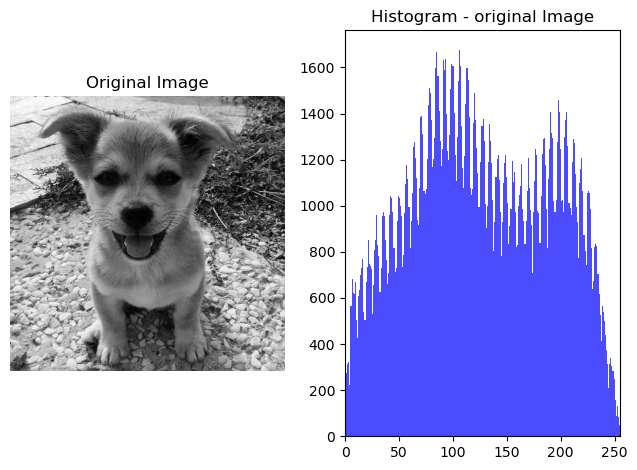

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path='puppy.jpg'
original_image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)


plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogram - original Image')
plt.xlim(0, 255)
    
plt.tight_layout()
plt.show()


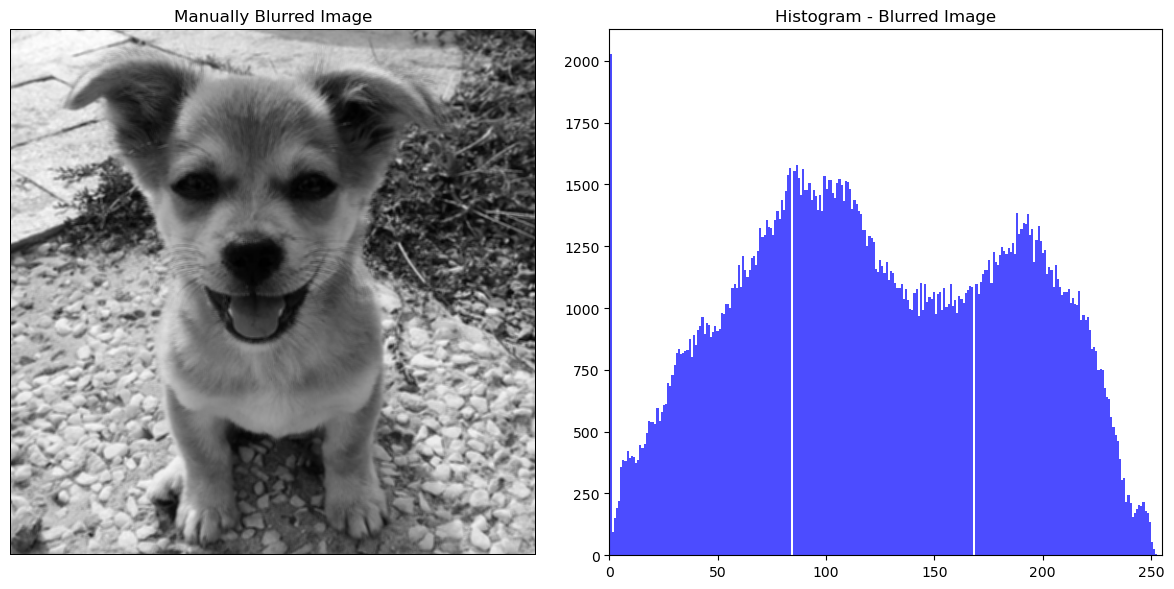

In [31]:

    kernel_size = 3
    offset = kernel_size // 2
    
    # Create a new image to store the blurred result
    blurred_image = np.zeros_like(original_image)

    # Apply the box blur manually (averaging kernel)
    for i in range(offset, original_image.shape[0] - offset):
        for j in range(offset, original_image.shape[1] - offset):
            # Extract the region of interest (ROI) of size kernel_size x kernel_size
            region = original_image[i-offset:i+offset+1, j-offset:j+offset+1]
            # Compute the average of the region
            blurred_image[i, j] = np.mean(region)
    
    # Plotting the blurred image and its histogram
    plt.figure(figsize=(12, 6))
    
    # Show the blurred image
    plt.subplot(1, 2, 1)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Manually Blurred Image')
    plt.axis('off')

    # Show the histogram of the blurred image
    plt.subplot(1, 2, 2)
    plt.hist(blurred_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Blurred Image')
    plt.xlim(0, 255)
    
    plt.tight_layout()
    plt.show()


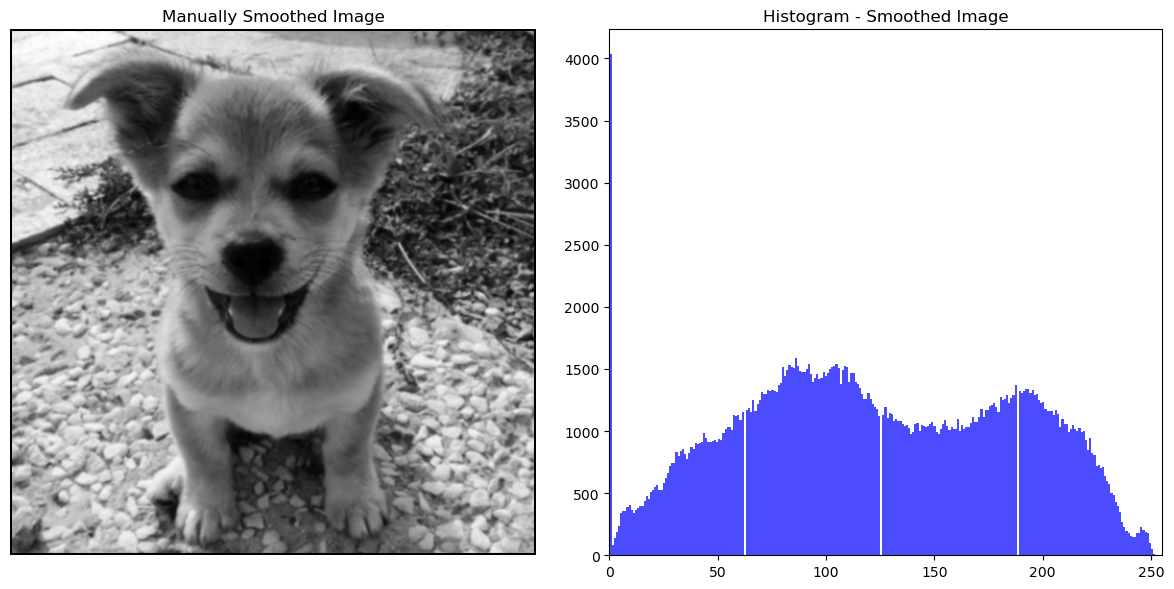

In [22]:
    kernel_size = 5
    offset = kernel_size // 2
    
   
    sigma = 1
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - 2)**2 + (y - 2)**2) / (2 * sigma**2)),
        (kernel_size, kernel_size)
    )
    kernel /= np.sum(kernel)  
    smoothed_image = np.zeros_like(original_image)
    for i in range(offset, original_image.shape[0] - offset):
        for j in range(offset, original_image.shape[1] - offset):
            region = original_image[i-offset:i+offset+1, j-offset:j+offset+1]
            smoothed_image[i, j] = np.sum(region * kernel)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title('Manually Smoothed Image')
    plt.axis('off')

    # Show the histogram of the smoothed image
    plt.subplot(1, 2, 2)
    plt.hist(smoothed_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Smoothed Image')
    plt.xlim(0, 255)
    
    plt.tight_layout()
    plt.show()


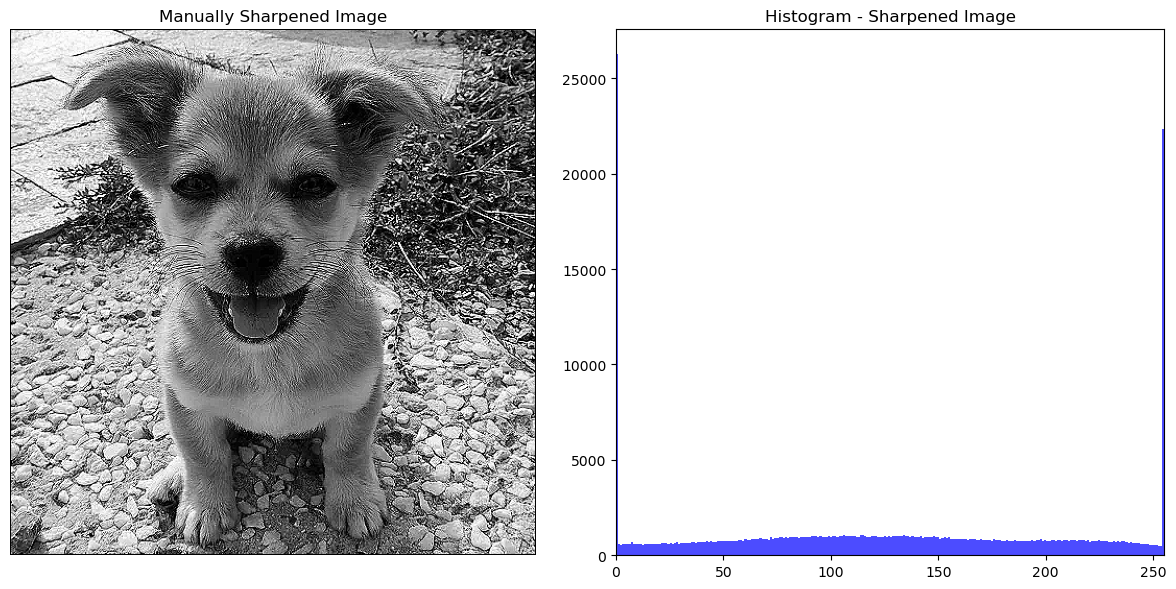

In [40]:
    sharpening_kernel = np.array([[0, -1, 0], 
                                  [-1, 5, -1], 
                                  [0, -1, 0]])
    
    # Create a new image to store the sharpened result
    sharpened_image = np.zeros_like(original_image)

    # Apply the sharpening kernel manually (convolution)
    offset = 1  # Since the kernel is 3x3, offset is 1
    for i in range(offset, original_image.shape[0] - offset):
        for j in range(offset, original_image.shape[1] - offset):
            region = original_image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            # Perform the convolution (sum of element-wise product of kernel and region)
            sharpened_value = np.sum(region * sharpening_kernel)
            sharpened_image[i, j] = np.clip(sharpened_value, 0, 255)  


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Manually Sharpened Image')
    plt.axis('off')

    # Show the histogram of the smoothed image
    plt.subplot(1, 2, 2)
    plt.hist(sharpened_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Sharpened Image')
    plt.xlim(0, 255)
    
    plt.tight_layout()
    plt.show()

   

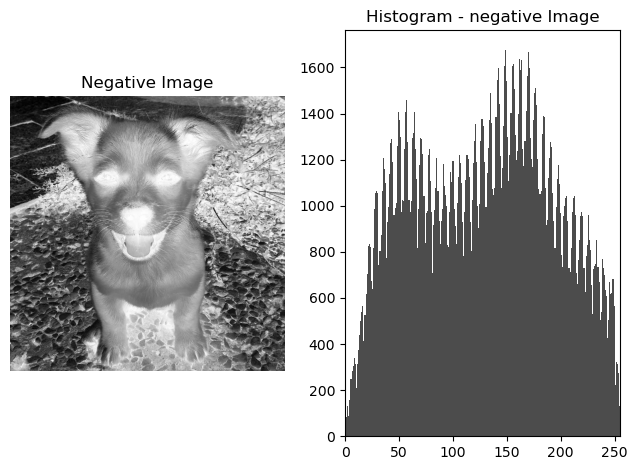

In [48]:

    # Create the negative image manually by subtracting from 255
    negative_image = 255 - original_image
    plt.subplot(1, 2, 1)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Image')
    plt.axis('off')

    # Show the histogram of the smoothed image
    plt.subplot(1, 2, 2)
    plt.hist(negative_image.ravel(), bins=256, color='black', alpha=0.7)
    plt.title('Histogram - negative Image')
    plt.xlim(0, 255)
    
    plt.tight_layout()
    plt.show()
   

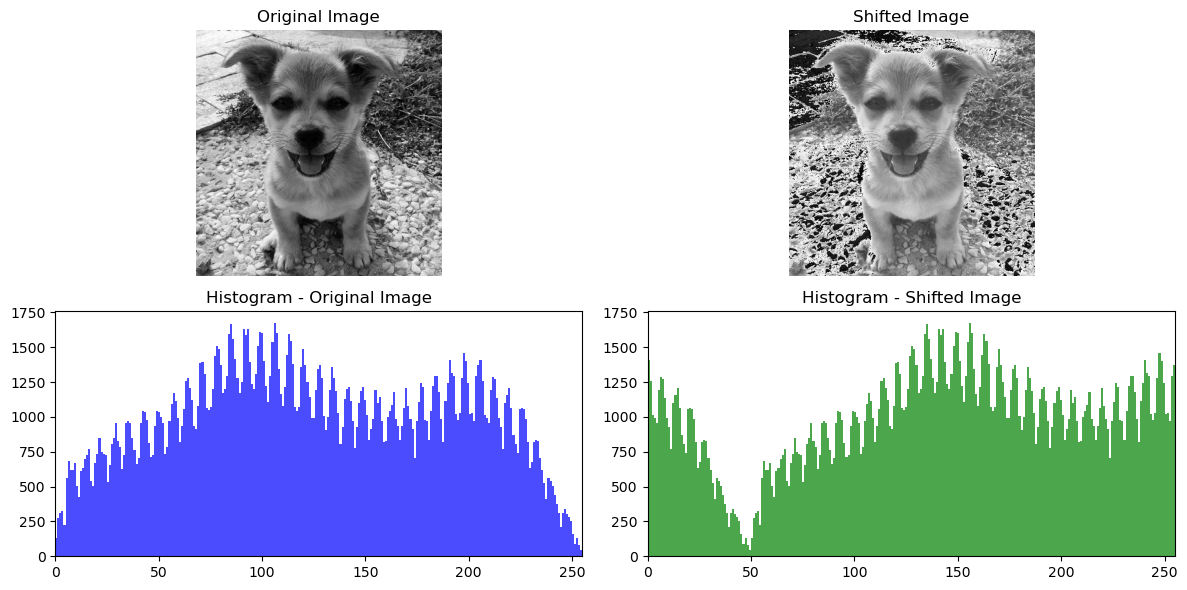

In [67]:

    shift_value = 50  # Example: Shift the histogram to the right by 50
    
    # Shift the image manually
    shifted_image = original_image + shift_value
    
    # Clip the pixel values to ensure they stay within the valid range [0, 255]
    shifted_image = np.clip(shifted_image, 0, 255)
    
    # Plotting the original and shifted image side by side
    plt.figure(figsize=(12, 6))
    
    # Show the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show the shifted image
    plt.subplot(2, 2, 2)
    plt.imshow(shifted_image, cmap='gray')
    plt.title('Shifted Image')
    plt.axis('off')
    
    # Plotting the histograms side by side
    # Histogram of the original image
    plt.subplot(2, 2, 3)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Original Image')
    plt.xlim(0, 255)
    
    # Histogram of the shifted image
    plt.subplot(2, 2, 4)
    plt.hist(shifted_image.ravel(), bins=256, color='green', alpha=0.7)
    plt.title('Histogram - Shifted Image')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()


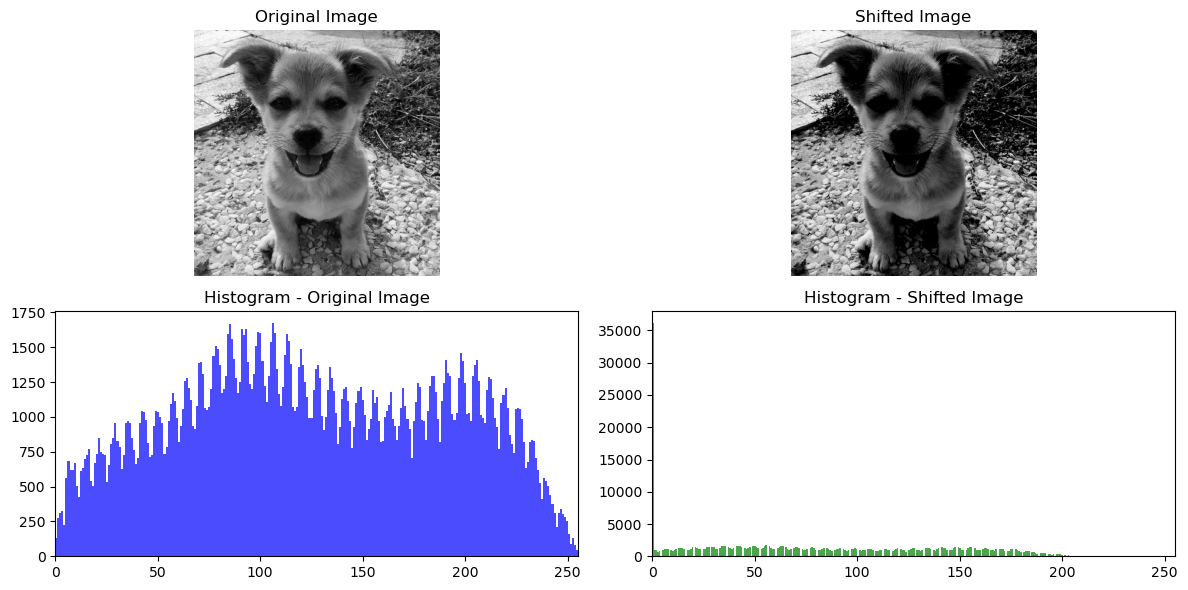

In [68]:

    shift_value = -50  # Example: Shift the histogram to the right by 50
    
    # Shift the image manually
    shifted_image = original_image + shift_value
    
    # Clip the pixel values to ensure they stay within the valid range [0, 255]
    shifted_image = np.clip(shifted_image, 0, 255)
    
    # Plotting the original and shifted image side by side
    plt.figure(figsize=(12, 6))
    
    # Show the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show the shifted image
    plt.subplot(2, 2, 2)
    plt.imshow(shifted_image, cmap='gray')
    plt.title('Shifted Image')
    plt.axis('off')
    
    # Plotting the histograms side by side
    # Histogram of the original image
    plt.subplot(2, 2, 3)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Original Image')
    plt.xlim(0, 255)
    
    # Histogram of the shifted image
    plt.subplot(2, 2, 4)
    plt.hist(shifted_image.ravel(), bins=256, color='green', alpha=0.7)
    plt.title('Histogram - Shifted Image')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()

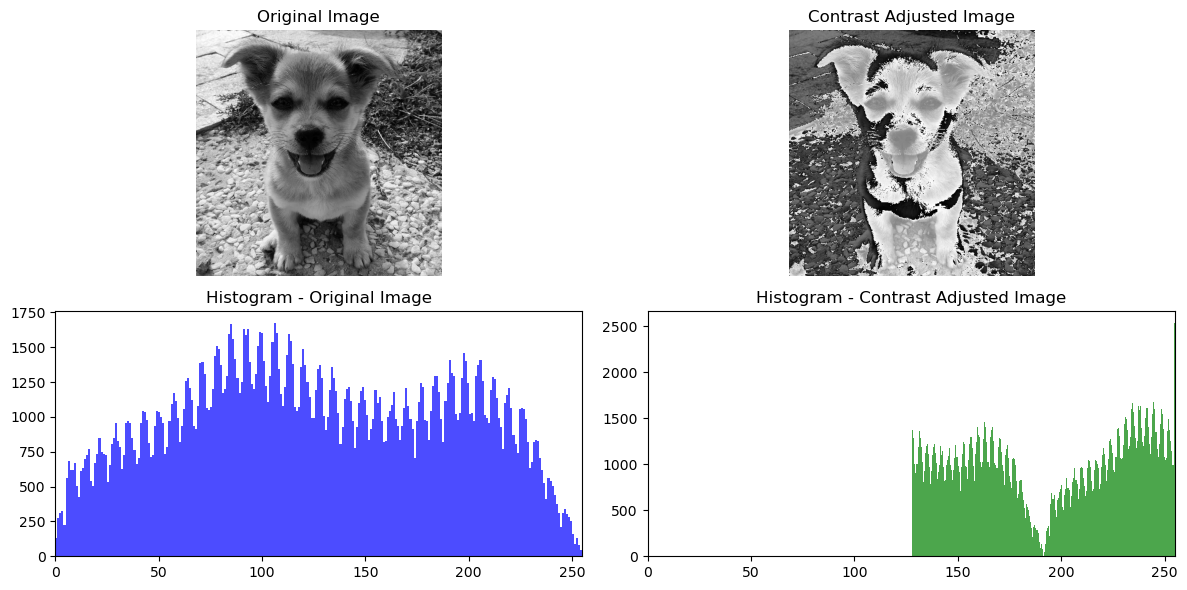

In [55]:

    alpha = 0.5 # Contrast increase factor (use alpha < 1 to decrease contrast)
    
    # Apply the contrast formula: new_pixel = alpha * (pixel - 128) + 128
    contrast_image = alpha * (original_image - 128) + 128
    
    # Clip the pixel values to ensure they stay within the valid range [0, 255]
    contrast_image = np.clip(contrast_image, 0, 255)
    
    # Plotting the original and contrast-adjusted image side by side
    plt.figure(figsize=(12, 6))
    
    # Show the original image
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Show the contrast-adjusted image
    plt.subplot(2, 2, 2)
    plt.imshow(contrast_image, cmap='gray')
    plt.title('Contrast Adjusted Image')
    plt.axis('off')
    
    # Plotting the histograms side by side
    # Histogram of the original image
    plt.subplot(2, 2, 3)
    plt.hist(original_image.ravel(), bins=256, color='blue', alpha=0.7)
    plt.title('Histogram - Original Image')
    plt.xlim(0, 255)
    
    # Histogram of the contrast-adjusted image
    plt.subplot(2, 2, 4)
    plt.hist(contrast_image.ravel(), bins=256, color='green', alpha=0.7)
    plt.title('Histogram - Contrast Adjusted Image')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()


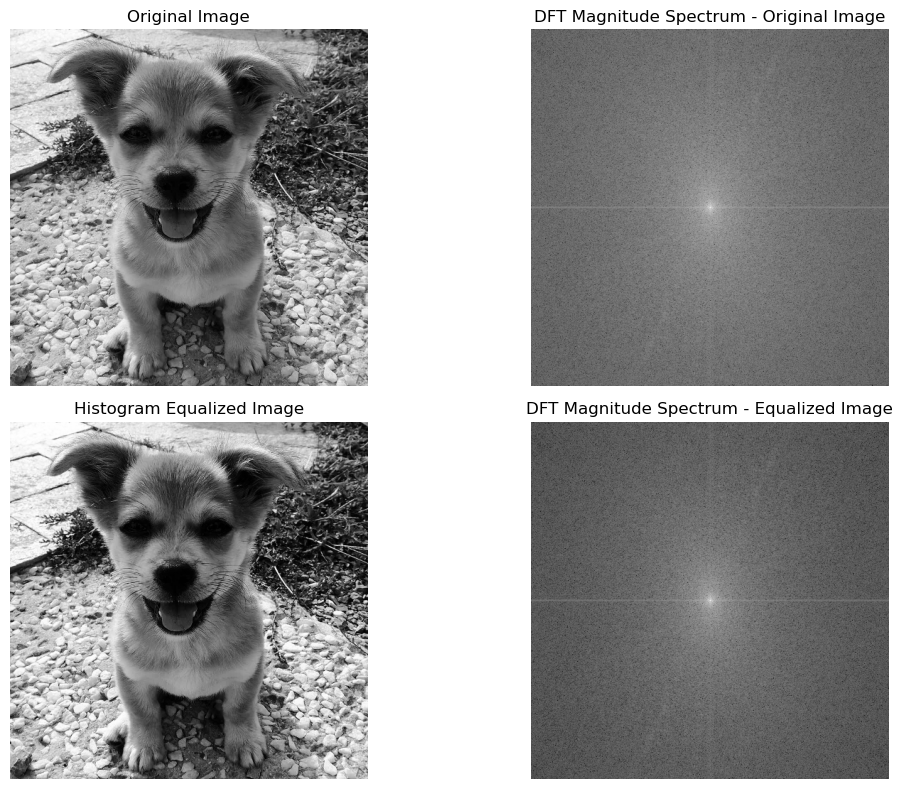

In [57]:
    equalized_image = cv2.equalizeHist(original_image)
    dft_original = cv2.dft(np.float32(original_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_original = np.fft.fftshift(dft_original)  
    magnitude_spectrum_original = cv2.magnitude(dft_shift_original[:, :, 0], dft_shift_original[:, :, 1])

    # Step 3: Perform DFT for histogram-equalized image
    dft_equalized = cv2.dft(np.float32(equalized_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_equalized = np.fft.fftshift(dft_equalized) 
    magnitude_spectrum_equalized = cv2.magnitude(dft_shift_equalized[:, :, 0], dft_shift_equalized[:, :, 1])
    plt.figure(figsize=(12, 8))

 
    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(np.log(magnitude_spectrum_original + 1), cmap='gray') 
    plt.title('DFT Magnitude Spectrum - Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Histogram Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(np.log(magnitude_spectrum_equalized + 1), cmap='gray')  
    plt.title('DFT Magnitude Spectrum - Equalized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
